In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


this shows that there are some missing values in total_bedroom and one feature is of object type means categorical value

In [4]:
# checking the type of object type feature
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# lets look at the other features description
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


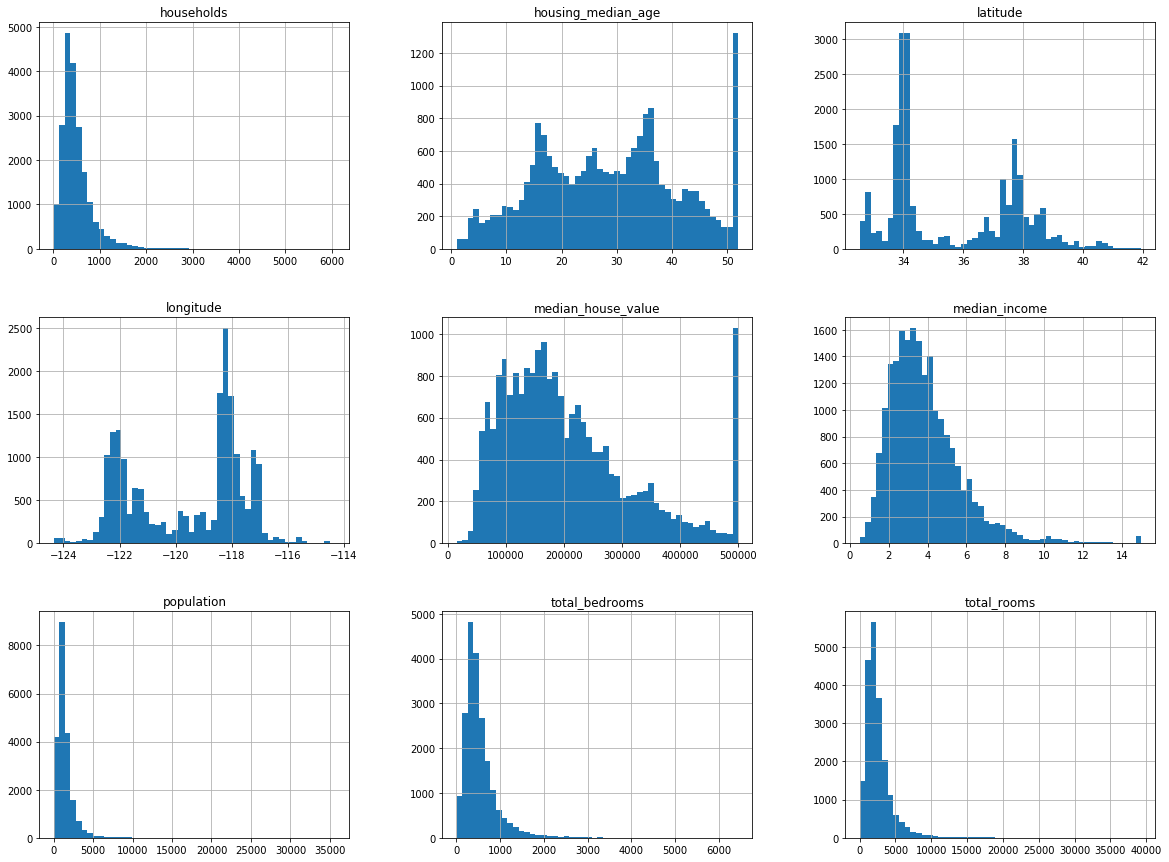

In [6]:
# another quick way to get the feel of the data you are dealing with is to plot a histogram for each numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Splitting data into training and testing set

## 1. By randomly slecting the indices

In [7]:
def split_train_set(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)  # gives no of indices we want to generate
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [8]:
train_set , test_set = split_train_set(housing,0.2)

In [9]:
len(train_set),len(test_set)

(16512, 4128)

In [10]:
# this case works fine but not great it because every time we run the notebook it will give different indices so its not consistent
# so we will split the dataset using sklearn's function as it contains random_state parameter which help us in generating same training and testing set
from sklearn.model_selection import train_test_split

In [11]:
train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [12]:
len(train_set),len(test_set)

(16512, 4128)

so far we have only considered purely random sampling this works fine when we have large dataset but when we are dealing with small dataset it may be the case that this may cause sampling bias.due to sampling buas our algorithm may not perform well on testing data because the data is different.
for eg in the dataset we have a parameter that conatins a (a feature) gender .it has 70% male and 30% female but when we randomly sample out training and testing set it may be the case that training set contains 90% male and 10% female due to which our algorithm will not be able to generalize so for such cases we need stratified sampling that helps us in maintaining the homogenous subgroups

### Splitting the data using stratified sampling

In [13]:
# creating a feature imcome_cat that helps us in dividing the data
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6,np.inf],
                              labels=[1,2,3,4,5])

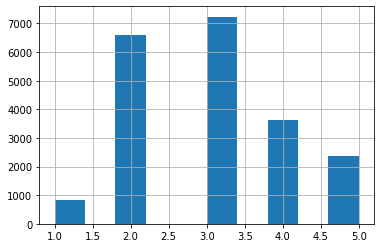

In [14]:
housing["income_cat"].hist()

In [15]:
# ratio of income cat in complete dataset
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(len(strat_train_set),len(strat_test_set))

16512 4128


In [18]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

As we can see the income category in both the training and testing set are same

In [20]:
#dropping the income _cat column as it is purely for the splitting basis
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [21]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# Discover and Visualize the data

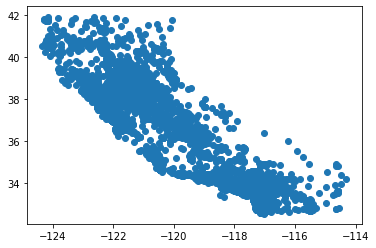

In [22]:
plt.scatter(housing["longitude"],housing["latitude"])

for better understanding we will modify some parameters now the colour represents the income value and the size of circle is responsible for population

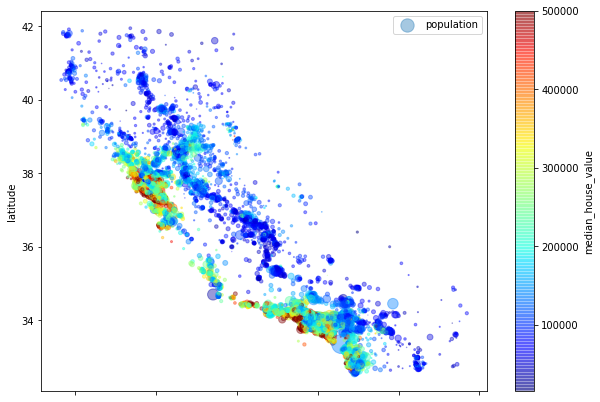

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
           c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [24]:
# looking for correlations
corr_mat = housing.corr()
corr_mat["median_house_value"].sort_values(ascending=False)
# as top three and last three values are more correlated so we will go deeper into that so that we can find more insights

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208A92E2080>,
      dtype=object)

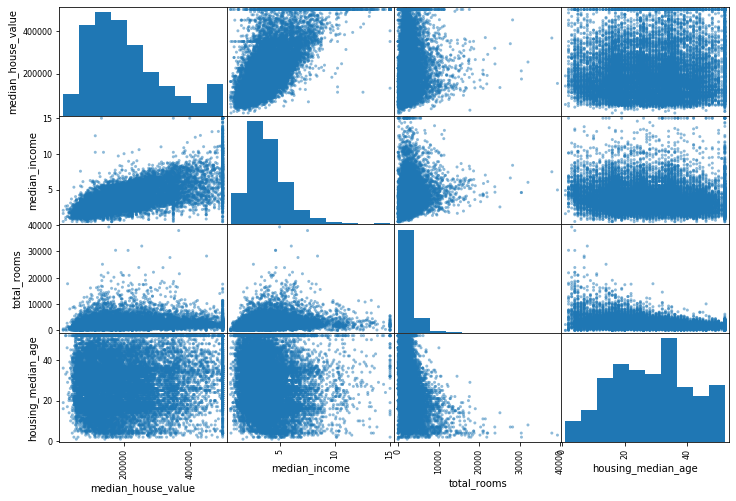

In [25]:
# another way to check correlation between numerical attributes is plotting scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

As we can see from the above graphs is meidan_house_values is positively correlated to median_income <br>
Sow we will get more insights into the median_house_value and median_income

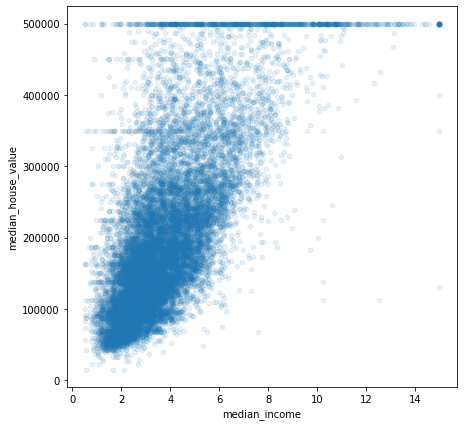

In [26]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,figsize=(7,7))

It contains some horizontal lines in between the plot like in range 500000 or around 350000 etc wo we also need to deal with them

# Experimenting with attribute combinations

In [27]:
# the data for some attributes are given district which is not useful like rooms per district is not that useful but rooms per household is definately more helpful
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedroom_per_hosehold"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedroom_per_hosehold,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [29]:
corr_mat = housing.corr()
corr_mat["median_house_value"].sort_values(ascending=False)
# we can see that the new features have much correlated than the old one so they are going to more useful

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_hosehold       -0.259984
Name: median_house_value, dtype: float64

# Prepare Data for Algorithms

In [30]:
# creating a new fresh training set and divide it in predictors and labels
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning
As the total_bedroom contains missing values so we need to deal with them also so we will fill the missing values bu the attribute's median

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy="median")

In [33]:
housing_numerical = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [34]:
#we are fitting the imputer to the whole data as in future we might get missing values for other features also
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
X = imputer.transform(housing_numerical)
housing_tr = pd.DataFrame(X,columns=housing_numerical.columns)

In [36]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [37]:
# dealing with categorical attribute
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [38]:
# to feed data to a Ml agorithms they prefer data itno numerical format so we will convert this object type data into numerical form
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_encoded = one_hot_encoder.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [39]:
from sklearn.base import BaseEstimator , TransformerMixin

In [40]:
rooms_ix , bedroom_ix , population_ix , households_ix = 3,4,5,6

In [41]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
            

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [43]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [44]:
housing_extra_attribs[0] 
# as we have given the parameter As False so thats why it has added only 2 columns

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

# Feature Scaling
Feature scaling is very important as machine learning algos dont perform well when the input numerical attributes have very different scales in this the ranges of features are very much different

In [45]:
# transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

__We can simply create a pipeline off all the steps we wanted to perform on the dataset__
### 1st Pipeline

In [50]:
# In here we are dealing with the numerial attributes of traininga data 
# the 1step is filling the missing value with attribute's median 2 nd step is to add new features and in 3rd step we are standardizing the attributes
num_pipeline = Pipeline([("imputer",SimpleImputer(strategy="median")),
                         ("attribs_adder",CombinedAttributesAdder()),
                         ("std_scaler",StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_numerical)

In [51]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

### 2nd pipeline
__combining 1st pipeline to this to create a full pipeline__

In [52]:
# so far we have handeled catrgorical data and numerical data sperately but it would be more convenient to have a single transformer
from sklearn.compose import ColumnTransformer

In [53]:
# similarly in this pipeline 1st we are appying the old pipeline and 2ndly we are dealing with object type of sttribute by encoding them with one hot encoder

num_attribs = list(housing_numerical)   # list of numerical attributes names

cat_attribs = ["ocean_proximity"]       # list of categorical attributes names

full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),    # applying the 1st pipeline
                                   ("cat",OneHotEncoder(),cat_attribs)])  # 1hotencoding the categorical attribute

housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
# this is the modified dataset in the form of array
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

That's it We have a preprocessing pipeline that takes the full housing data and apply the appropriate transformations to each column

# Select and Train a Model

### Training and Evaluating on the Training Set

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [59]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)   # transforming the some_data
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [60]:
print("Labels:",list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# lets measure the regression model RMSE
housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse =np.sqrt( mean_squared_error(housing_predictions,housing_labels))
lin_rmse

68628.19819848923

As we can see that is the model is not giving the good predictions on the training data so it is a underfitting case means high bias low variance when this happens it means the features are not providing enough information or the model is not powerful enough

### Training Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [65]:
#evaluate it on training
housing_predictions = dec_tree.predict(housing_prepared)
dec_tree_rmse = np.sqrt(mean_squared_error(housing_labels,housing_predictions))
dec_tree_rmse

0.0

This is even worse as the rmse is 0 means our model has overfitted the data badly but we need more evaluation that provied more validation

## Better Evaluation using Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71552.91566558, 67665.10082067])

In [75]:
print("treee mean score:",lin_reg_rmse_scores.mean(),"Tree std:",lin_reg_rmse_scores.std())

treee mean score: 69052.46136345083 Tree std: 2731.6740017983493


In [69]:
# using scikit-learns k-fold cross validation it randomly splits the training data into k number of folds
#then it trains on them and evaluates the model
#in k fold CV it trains the model on k-1 folds and test it on k-th fold and evaluates the performance

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dec_tree,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69644.40729154, 64718.48695446, 72097.33913869, 69107.25865864,
       70237.65269863, 74254.09151612, 70607.80694349, 70858.40954889,
       77512.20315042, 70138.3231902 ])

In [73]:
print("treee mean score:",tree_rmse_scores.mean(),"Tree std:",tree_rmse_scores.std())

treee mean score: 70917.59790910869 Tree std: 3170.318354785259


As we can see linear model is performing better tha decision tree it because decision tree model is overfitting

## RandomForestRegressor Model

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [79]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_predictions,housing_labels))
forest_rmse

18710.82371413163

In [81]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

array([49798.49086415, 47498.97775309, 49688.18062204, 52005.23239641,
       49842.41025636, 53355.95628085, 48980.62639903, 48028.39827387,
       52705.08711464, 49679.60812693])

In [83]:
print("treee mean score:",forest_reg_rmse_scores.mean(),"Tree std:",forest_reg_rmse_scores.std())

treee mean score: 50158.29680873789 Tree std: 1838.3984319000112


As we can seee form the above implementation that random forest regressor works better than decision tree or linear model but we still need to improve it by tuning its hyperparameter

# Saving a Model

In [85]:
import joblib

In [86]:
filename = 'random_for_reg.pkl'
joblib.dump(forest_reg, filename)

#loading model
loaded_model = joblib.load(filename)

# Hyperparameter tuning

In [87]:
# After shortlisting we should tune the hyperparameters of the model using randomsearchcv or gridsearch
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8],"max_depth":[None,2,4,5]}, 
             {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4],"max_depth":[None,2,4,5]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid=param_grid,n_jobs=1,scoring="neg_mean_squared_error",
                           cv=5,return_train_score=True,verbose=True)

grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid=[{'max_depth': [None, 2, 4, 5],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_depth': [None, 2, 4, 5],
                          'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [141]:
cvres = grid_search.cv_results_
for mean_score,param in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),param)


64289.94219259372 {'max_depth': None, 'max_features': 2, 'n_estimators': 3}
55548.231395272574 {'max_depth': None, 'max_features': 2, 'n_estimators': 10}
53194.96255881888 {'max_depth': None, 'max_features': 2, 'n_estimators': 30}
60155.93898057168 {'max_depth': None, 'max_features': 4, 'n_estimators': 3}
52375.44564757887 {'max_depth': None, 'max_features': 4, 'n_estimators': 10}
50637.36519704068 {'max_depth': None, 'max_features': 4, 'n_estimators': 30}
59335.14263016251 {'max_depth': None, 'max_features': 6, 'n_estimators': 3}
51724.301482990755 {'max_depth': None, 'max_features': 6, 'n_estimators': 10}
49737.55005616312 {'max_depth': None, 'max_features': 6, 'n_estimators': 30}
58148.3668405951 {'max_depth': None, 'max_features': 8, 'n_estimators': 3}
51749.650601674104 {'max_depth': None, 'max_features': 8, 'n_estimators': 10}
50229.25012207583 {'max_depth': None, 'max_features': 8, 'n_estimators': 30}
93960.01177921216 {'max_depth': 2, 'max_features': 2, 'n_estimators': 3}
93121

In [142]:
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'max_features': 6, 'n_estimators': 30}

In [143]:
forest_reg_tuned = RandomForestRegressor(n_estimators=best_params["n_estimators"],max_depth=best_params["max_depth"],
                                   max_features=best_params["max_features"])
forest_reg_tuned.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg_tuned.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_predictions,housing_labels))
forest_rmse

19459.726143361226

In [144]:
scores = cross_val_score(forest_reg_tuned,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_reg_rmse_scores_tuned = np.sqrt(-scores)
forest_reg_rmse_scores_tuned

array([48494.12852017, 47152.92432496, 49538.56308006, 51447.11407022,
       48966.13761113, 53010.92193045, 48334.12398809, 47878.01886193,
       51928.69220416, 49144.52020542])

In [145]:
print("MEAN OF RMSE SCORES:",forest_reg_rmse_scores_tuned.mean(),"STD OF RMSE SCORES:",forest_reg_rmse_scores.std())

MEAN OF RMSE SCORES: 49589.514479658144 STD OF RMSE SCORES: 1838.3984319000112


In [146]:
zip(grid_search.best_estimator_.feature_importances_,

array([7.17820283e-02, 7.15620909e-02, 4.40010128e-02, 1.77231759e-02,
       1.67112614e-02, 1.75414957e-02, 1.63086821e-02, 3.09029391e-01,
       5.95155116e-02, 1.14668427e-01, 9.98730420e-02, 9.78274622e-03,
       1.42247523e-01, 7.42837248e-05, 3.67344719e-03, 5.50588053e-03])

In [163]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = num_attribs + ["room_per_hhold","pop_per_hhold","bedroom_per_room"] + list(full_pipeline.named_transformers_["cat"].categories_[0])
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3090293912377407, 'median_income'),
 (0.14224752322616854, 'INLAND'),
 (0.11466842719351152, 'pop_per_hhold'),
 (0.09987304200011635, 'bedroom_per_room'),
 (0.07178202833466896, 'longitude'),
 (0.07156209087167666, 'latitude'),
 (0.0595155115965868, 'room_per_hhold'),
 (0.044001012775851785, 'housing_median_age'),
 (0.01772317587264467, 'total_rooms'),
 (0.01754149571193558, 'population'),
 (0.01671126139880793, 'total_bedrooms'),
 (0.016308682111859058, 'households'),
 (0.009782746223532023, '<1H OCEAN'),
 (0.005505880526125249, 'NEAR OCEAN'),
 (0.0036734471939907287, 'NEAR BAY'),
 (7.428372478338073e-05, 'ISLAND')]

## Evaluating the best model on test dataset

In [164]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)

Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(final_predictions,Y_test))

final_rmse

48255.955065948016